<a href="https://www.kaggle.com/code/tarizatique/kneighbors-classifier?scriptVersionId=106368741" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glass-company/glass.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
#importing dataset
glass = pd.read_csv("../input/glass-company/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**EDA**

In [4]:
glass.shape

(214, 10)

In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

**Data Visualisation**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8dd16102d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8dd1626390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8dd1610a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8dd1626a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8dd1626d90>],
 'means': []}

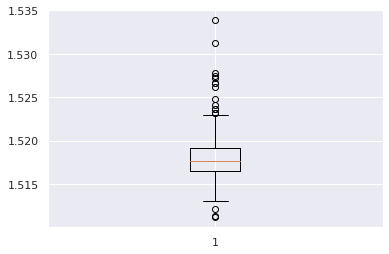

In [8]:
plt.boxplot(glass.RI)

In [9]:
df1 = glass.iloc[ : , :3]
df2 = glass.iloc[: , 2:6]
df3 = glass.iloc[: , 5:9]


<AxesSubplot:>

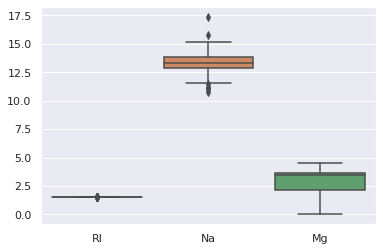

In [10]:
sns.boxplot(data = df1)


<AxesSubplot:>

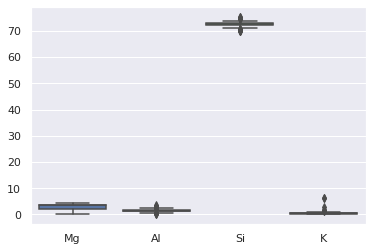

In [11]:
sns.boxplot(data = df2)

<AxesSubplot:>

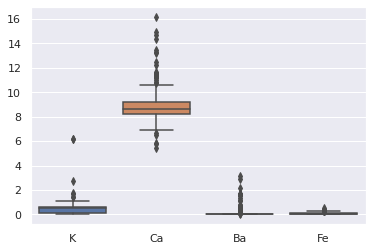

In [12]:

sns.boxplot( data = df3)

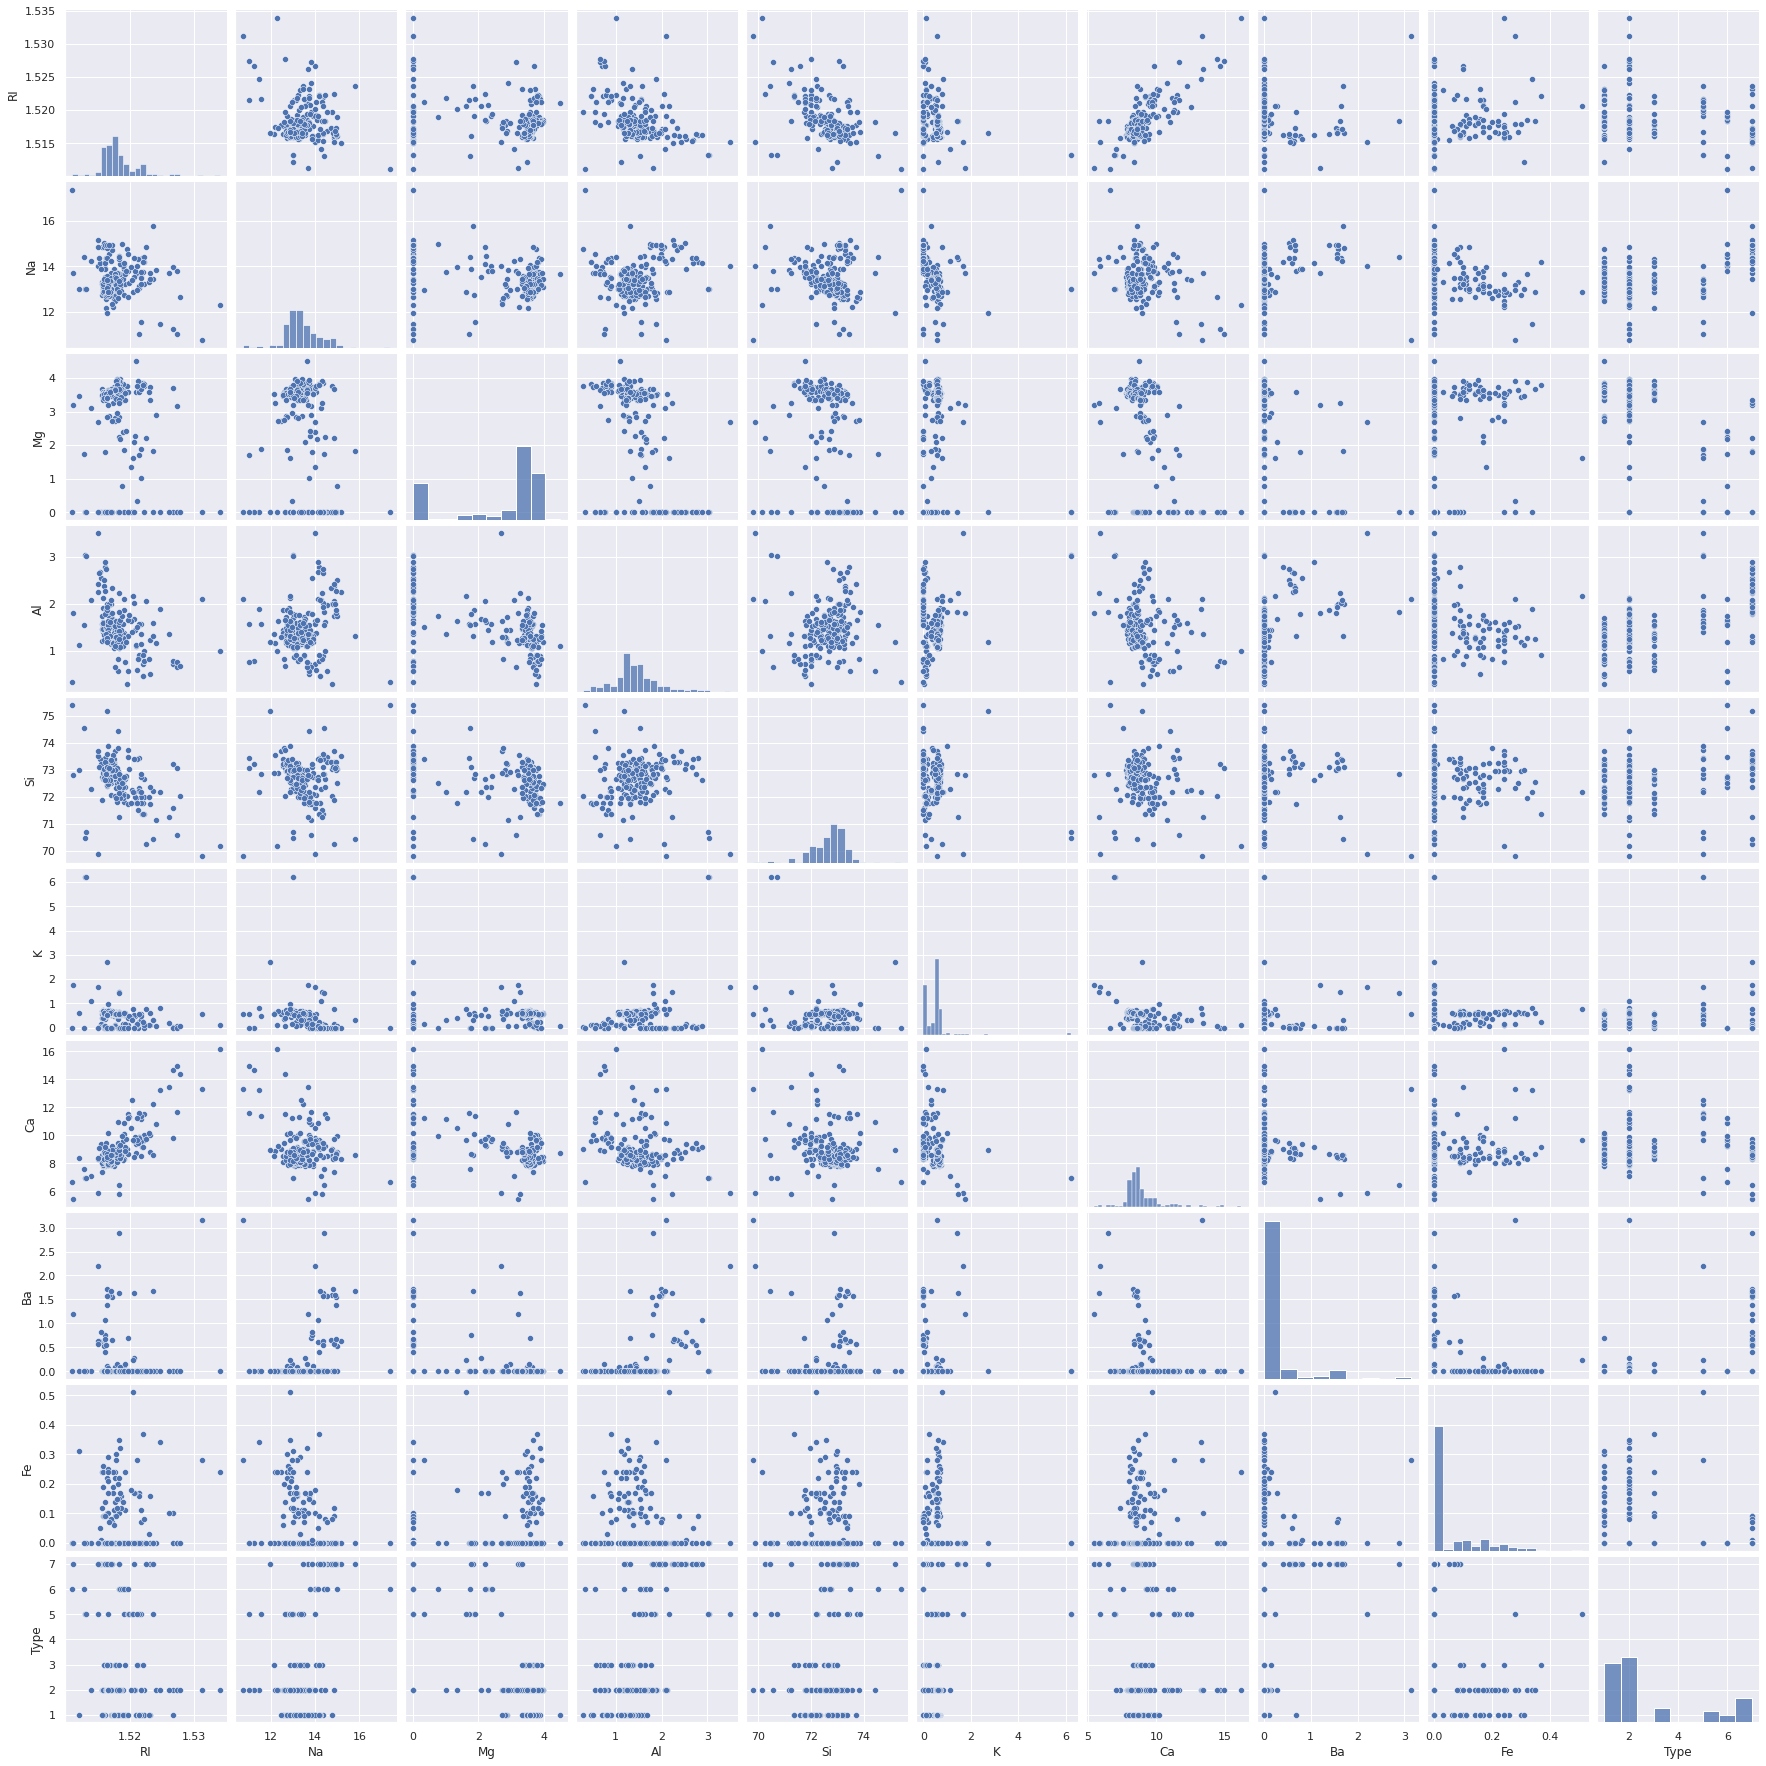

In [13]:
sns.pairplot(glass)

In [14]:
X = glass.drop(['Type'], axis = 1)
y = glass['Type']

In [15]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

In [16]:
X = scl.fit_transform(X)

In [17]:
#splitting data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size= 0.3,random_state=4)

In [18]:
#creating KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Train model and Predict
k=1
neigh=KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
pred_y = neigh.predict(X_test)

In [19]:
#accuracy
print("Accuracy of model at k=1",metrics.accuracy_score(y_test,pred_y))

Accuracy of model at k=1 0.8615384615384616


In [20]:
#error rate
error_rate =[]
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.13846153846153847 at K = 0


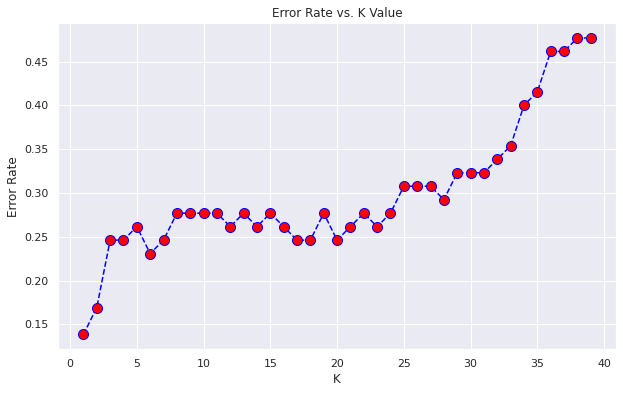

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
# by looking plot you can see least error rate at 2

In [22]:
#checking best accuracy at k value
acc = []

from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    


Maximum accuracy:- 0.8615384615384616 at K = 1. 0


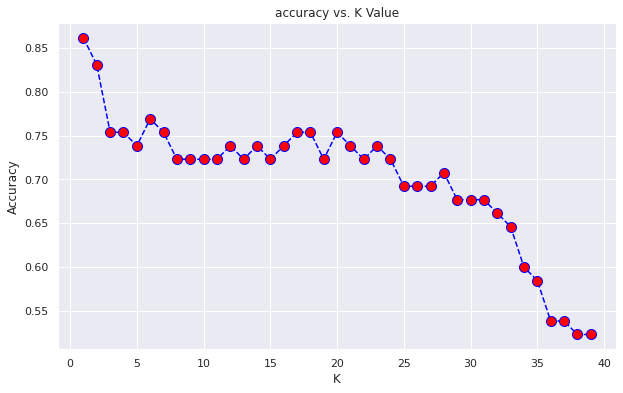

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K = 1.",acc.index(max(acc)))
#by looking at the plot we can seehighest accuracy at K=1